In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from functools import reduce

from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT
    
)

import darts.datasets
from darts.models import StatsForecastAutoARIMA
from darts.models import RegressionModel
from darts.models import ExponentialSmoothing
from darts.models import RNNModel, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries
import matplotlib.pyplot as plt



from darts.metrics import mape, mase
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis, plot_hist
from darts.datasets import AirPassengersDataset

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

C:\Users\ShodipeO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


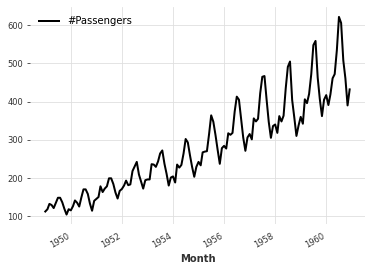

In [3]:
series = AirPassengersDataset().load()
series.plot()

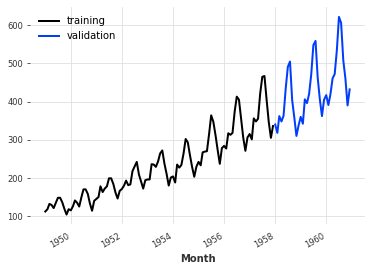

In [4]:
train, val = series.split_before(pd.Timestamp('19580101'))
train.plot(label='training')
val.plot(label='validation')
plt.legend();

Playing with toy models
There is a collection of "naive" baseline models in darts, which can be very useful to get an idea of the bare minimum accuracy that one could expect. For example, the NaiveSeasonal(K) model always "repeats" the value that occured K time steps ago.

In its most naive form, when K=1, this model simply always repeats the last value of the training series:

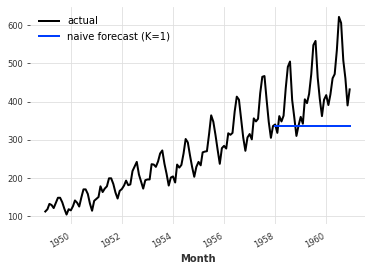

In [5]:
naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label='actual')
naive_forecast.plot(label='naive forecast (K=1)')
plt.legend();

Inspect Seasonality
Our model above is perhaps a bit too naive. We can already improve by exploiting the seasonality in the data. It seems quite obvious that the data has a yearly seasonality, which we can confirm by looking at the auto-correlation function (ACF), and highlighting the lag m=12:

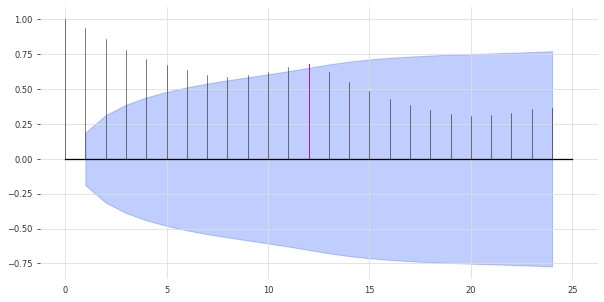

In [9]:
plot_acf(train, m = 12, alpha = .05)

In [13]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=.05)
    if is_seasonal:
        print('There is seasonality of order {}.'.format(period))

There is seasonality of order 12.


In [14]:
%store -r glulamFeatures_traina
%store -r glulamFeatures_testa
%store -r glulamMargin_traina
%store -r glulamMargin_testa

In [15]:
glulamMargin_traina_timeseries= TimeSeries.from_group_dataframe(glulamMargin_traina,
                                                                group_cols=['Plant_Info'],
                                                                time_col='Date',
                                                                value_cols=['Margin_Stattransformed'])

glulam_transformed_data_Features_timeseries= TimeSeries.from_group_dataframe(glulamFeatures_traina,
                                                                group_cols=['Plant_Info'],
                                                                time_col='Date',
                                                                value_cols=['HousingStartstransformed', 'StatQtytransformed', 'NetWeighttransformed'])

#LinearRegression Forecasting

In [16]:

model=RegressionModel(
                       lags=[-1,-2],
                       lags_future_covariates=[0],
                       model=LinearRegression()
                       )

model.fit(glulamMargin_traina_timeseries, future_covariates=glulam_transformed_data_Features_timeseries)


NameError: name 'LinearRegression' is not defined

In [ ]:

glulamMargin_traina_timeseries_pred=model.predict(n=5, 
                                                  series=glulamMargin_traina_timeseries[:12],
                                                  future_covariates=glulam_transformed_data_Features_timeseries[:12])

In [ ]:
#print("Mape={:.2f}%".format(mape(glulamMargin_traina_timeseries,glulamMargin_traina_timeseries_pred)))

glulamMargin_traina_timeseries.plot(label="Predicted")
glulamMargin_traina_timeseries.plot(label="actual")
plt.legend()

C:\Users\ShodipeO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\darts\timeseries.py:4039: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(
C:\Users\ShodipeO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\darts\timeseries.py:4039: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(time_idx, pd.Int64Index) and not isinstance(
C:\Users\ShodipeO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\darts\timeseries.py:4039: FutureWarning: pandas.Int64Index is deprecated and will be removed from pa

ValueError: x and y must be the same size

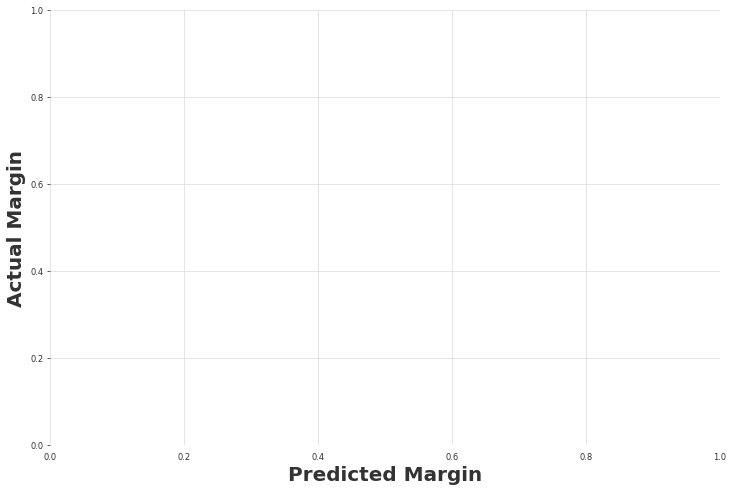

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted Margin",fontsize=20)
plt.ylabel("Actual Margin",fontsize=20)
plt.grid(1)
plt.scatter(glulamMargin_traina_timeseries, glulamMargin_traina_timeseries_pred,edgecolors=(0,0,0),lw=2,s=80)
plt.ylim(0.02, 0.6)
plt.xlim(0.02,0.6)
xpoints=ypoints=plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)


# Linear Regression  regularization or cross validation (LASSO)

In [ ]:
lin_model1allL = LassoCV(cv=10,verbose=0,normalize=True,eps=0.000001,n_alphas=7, tol=0.0001,max_iter=50000000)

In [ ]:

lin_model1allL.fit(glulamFeatures_traina, glulamMargin_traina)

ValueError: could not convert string to float: '2020-01-01'

In [ ]:
Margin_pred_model1allL = lin_model1allL.predict(glulamFeatures_traina)

In [ ]:
#Train_Predict
print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allL), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allL), 2))

Mean absolute error = 0.22
Mean squared error = 0.07
Median absolute error = 0.2
Explain variance score = 0.3
R2 score = 0.3


In [ ]:
pd.set_option('display.max_rows', None)
coeff_model1allL = pd.DataFrame(lin_model1allL.coef_[0:230], index=glulamFeatures_traina.columns[0:230], 
                          columns=['glulamMargin_traina'])
coeff_model1allL

glulamMargin_traina
HousingStartstransformed             0.663259
StatQtytransformed                  -0.192700
NetWeighttransformed                -0.031044

LogisticRegression

Neural Net


model = Sequential([
    Dense(16, input_shape=(29,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
#optimizer=tf.keras.optimizer.RMSprop(0.001)
model.compile(Adam(lr=.0001), loss='mse', metrics=['mae','mse'])
Epochs=1000
#early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(glulamFeatures_traina, glulamMargin_traina, batch_size=10, epochs=Epochs,  shuffle=True, verbose=2)
#Train_Predict
Margin_pred_model1allNeuralNet= model.predict(glulamFeatures_traina)


#Train_data

print("Mean absolute error =", round(sm.mean_absolute_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(glulamMargin_traina, Margin_pred_model1allNeuralNet), 2)) 
print("R2 score =", round(sm.r2_score(glulamMargin_traina,Margin_pred_model1allNeuralNet), 2))


#Re-run the model to visualize and so,  save the model in
lin_model1allNeuralNet=model.fit(glulamFeatures_traina, glulamMargin_traina, batch_size=10, epochs=Epochs, validation_split=0.2, shuffle=True, verbose=2, callbacks=[early_stop])
 

#Visuals lin_model1allNeuralNet.history
NeuralNetVisuals= pd.DataFrame(lin_model1allNeuralNet.history)
NeuralNetVisuals['Epoch']= lin_model1allNeuralNet.epoch
NeuralNetVisuals.tail()